Image data shape = (1797, 64)
Label data shape = (1797,)


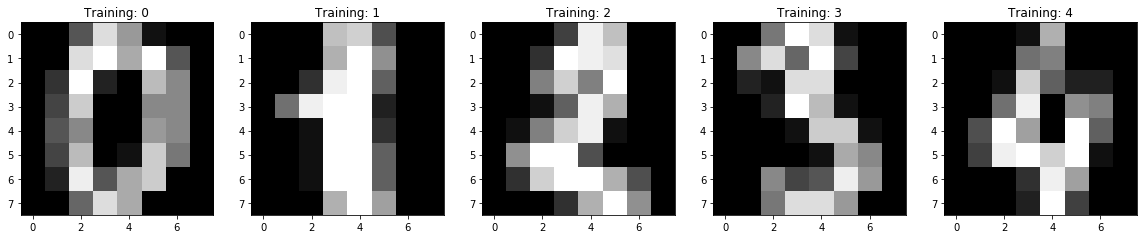

In [23]:
# load dataset

# useful links:
#     - https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a
#     - https://towardsdatascience.com/receiver-operating-characteristic-curves-demystified-in-python-bd531a4364d0
#     - https://acutecaretesting.org/en/articles/precision-recall-curves-what-are-they-and-how-are-they-used

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

digitsDataset = load_digits()

print(f'Image data shape = {digitsDataset.data.shape}')
print(f'Label data shape = {digitsDataset.target.shape}')

plt.figure(figsize=(20, 4))

for index, (image, label) in enumerate(zip(digitsDataset.data[:5], digitsDataset.target[:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8, 8)), cmap=plt.cm.gray)
    plt.title(f'Training: {label}')

X_train, X_test, y_train, y_test = train_test_split(digitsDataset.data, digitsDataset.target, test_size=0.2)

Models metrics:
	Accuracy = 0.9722222222222222
	Precision-recall score:
		[0.975      0.90909091 1.         0.94444444 1.        ]
		[1.         1.         0.97619048 0.94285714 0.97142857]
	F1 score:
		[0.98734177 0.9375     0.98550725 0.97142857 0.98305085]
		[0.98765432 1.         0.97619048 0.94285714 0.94444444]


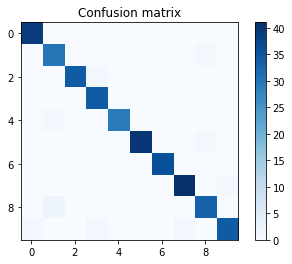

In [36]:
# create a model

import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score


logisticRegression = LogisticRegression()
logisticRegression.fit(X_train, y_train)
y_predict = logisticRegression.predict(X_test)

print('Models metrics:')
print(f'\tAccuracy = {accuracy_score(y_test, y_predict)}')
precisionScore = precision_score(y_test, y_predict, average=None)
print(f'\tPrecision-recall score:')
print(f'\t\t{precisionScore[:5]}')
print(f'\t\t{precisionScore[5:]}')
f1Score = f1_score(y_test, y_predict, average=None)
print(f'\tF1 score:')
print(f'\t\t{f1Score[:5]}')
print(f'\t\t{f1Score[5:]}')

plt.imshow(confusion_matrix(y_test, y_predict), cmap=plt.cm.Blues, interpolation='nearest')
plt.title('Confusion matrix')
plt.colorbar()